## Tugas Kecil 2 IF3170 Inteligensi Buatan 
#### Exploratory Data Analysis

Anggota Kelompok

NIM | Nama |
--- | --- |
13521071 | Margaretha Olivia Haryono |
13521084 | Austin Gabriel Pardosi |

### Tahap Persiapan (Prerequisite)
---
---
Sebelum melakukan pengerjaan soal-soal tugas kecil 2, dibutuhkan setup sebagai prerequisite atau tahap persiapan. Prerequisite dilakukan dengan melakukan import library dan mengubah file CSV menjadi sebuah dataframe yang nantinya akan digunakan.

##### Import Library

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

##### Load Data

In [82]:
df_train = pd.read_csv("data/data_train.csv")
display(df_train[:5])

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,804,1,0.8,1,12,1,41,0.9,89,1,...,709,818,2027,11,5,11,1,0,0,1
1,1042,0,2.2,0,15,1,11,0.6,139,5,...,68,1018,2826,18,0,2,1,0,0,2
2,1481,1,2.0,1,0,0,35,0.5,105,3,...,249,522,2635,17,16,4,1,0,1,2
3,1104,0,1.7,0,1,1,60,0.4,199,2,...,653,1413,1229,6,0,3,1,1,1,0
4,652,0,0.5,1,1,0,58,0.6,142,3,...,464,781,565,18,12,9,0,0,1,0


In [83]:
df_validation = pd.read_csv("data/data_validation.csv")
display(df_train[:5])

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,804,1,0.8,1,12,1,41,0.9,89,1,...,709,818,2027,11,5,11,1,0,0,1
1,1042,0,2.2,0,15,1,11,0.6,139,5,...,68,1018,2826,18,0,2,1,0,0,2
2,1481,1,2.0,1,0,0,35,0.5,105,3,...,249,522,2635,17,16,4,1,0,1,2
3,1104,0,1.7,0,1,1,60,0.4,199,2,...,653,1413,1229,6,0,3,1,1,1,0
4,652,0,0.5,1,1,0,58,0.6,142,3,...,464,781,565,18,12,9,0,0,1,0


### SOAL 1 : Menuliskan statistik dasar
---
---

In [84]:
statistic = df_train.describe()

statistic.loc['median'] = df_train.median()
statistic.loc['variance'] = df_train.var()
statistic.loc['range'] = df_train.max() - df_train.min()
statistic.loc['IQR'] = df_train.quantile(0.75) - df_train.quantile(0.25)
statistic.loc['skewness'] = df_train.skew()
statistic.loc['kurtosis'] = df_train.kurtosis()

statistic

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,...,1400.000000,1400.000000,1.400000e+03,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000
mean,1237.145714,0.493571,1.521714,0.502857,4.275000,0.530000,31.962143,0.507857,139.375714,4.481429,...,643.177857,1251.717143,2.106731e+03,12.285714,5.665000,11.042143,0.760714,0.489286,0.495000,1.477857
std,430.051785,0.500137,0.814723,0.500171,4.324170,0.499278,18.162970,0.288539,35.400803,2.279836,...,444.628980,428.982850,1.078347e+03,4.204198,4.372234,5.399052,0.426800,0.500064,0.500154,1.117575
min,501.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,2.560000e+02,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,864.750000,0.000000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,108.000000,2.000000,...,273.750000,876.500000,1.201000e+03,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.000000
50%,1219.000000,0.000000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,139.000000,4.000000,...,561.000000,1247.000000,2.102000e+03,12.000000,5.000000,11.000000,1.000000,0.000000,0.000000,1.000000
75%,1602.000000,1.000000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,169.000000,7.000000,...,950.250000,1627.500000,3.035750e+03,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.000000
max,1998.000000,1.000000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3.998000e+03,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000
median,1219.000000,0.000000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,139.000000,4.000000,...,561.000000,1247.000000,2.102000e+03,12.000000,5.000000,11.000000,1.000000,0.000000,0.000000,1.000000
variance,184944.537723,0.250137,0.663774,0.250171,18.698445,0.249278,329.893491,0.083255,1253.216851,5.197653,...,197694.929745,184026.285910,1.162833e+06,17.675278,19.116430,29.149760,0.182158,0.250064,0.250154,1.248973


In [85]:
# modus
print("MODUS", end="\n\n")
for column in df_train:
    modus = df_train[column].mode()
    print(f'{column}', end='')
    for i in range(25 - len(column)):
        print(' ', end='')
    if (len(modus) != df_train.shape[0]):
        for i in range(len(modus)):
            if i != len(modus) - 1:
                print(modus[i], end=', ')
            else:
                print(modus[i])
    else:
        print("semua value (unik)")

MODUS

battery_power            772, 1068, 1330, 1872, 1949
blue                     0
clock_speed              0.5
dual_sim                 1
fc                       0
four_g                   1
int_memory               27
m_dep                    0.1
mobile_wt                182
n_cores                  4
pc                       10
px_height                88, 347, 526
px_width                 1247
ram                      1229, 3142
sc_h                     17
sc_w                     1
talk_time                15
three_g                  1
touch_screen             0
wifi                     0
price_range              0


### SOAL 2 : Mencari <i>Duplicate value<i>
---
---

In [86]:
duplicates = df_train[df_train.duplicated()]
print("Jumlah data duplikat:", len(duplicates))

Jumlah data duplikat: 0


### SOAL 3 : Mencari <i>Missing value<i>
---
---

In [87]:
missing_values = df_train.isnull().sum()

print("Jumlah missing value untuk setiap kolom: ")
print(missing_values)

Jumlah missing value untuk setiap kolom:
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64


### SOAL 4 : Mencari <i>Outlier<i>
---
---

Outliers pada kolom 'battery_power': Tidak ditemukan outliers


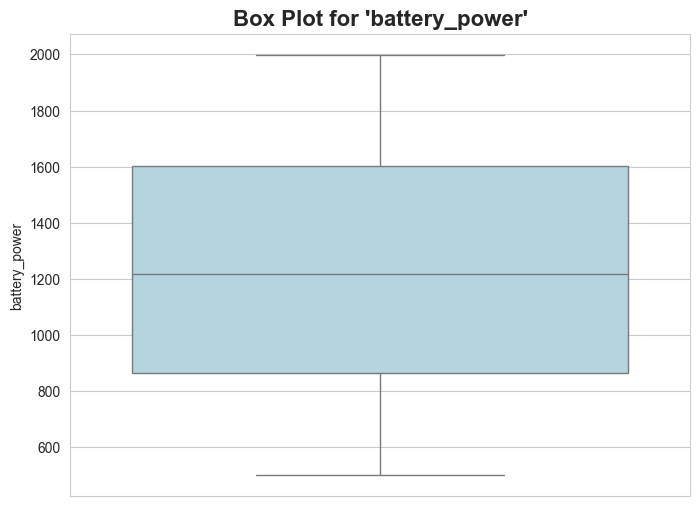

Outliers pada kolom 'blue': Tidak ditemukan outliers


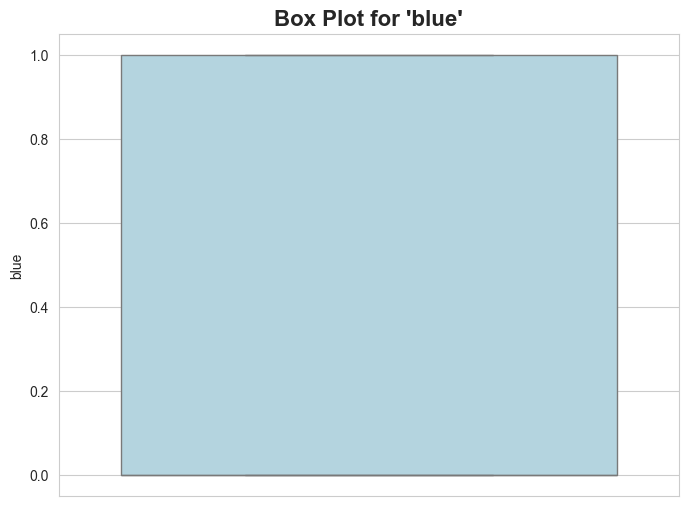

Outliers pada kolom 'clock_speed': Tidak ditemukan outliers


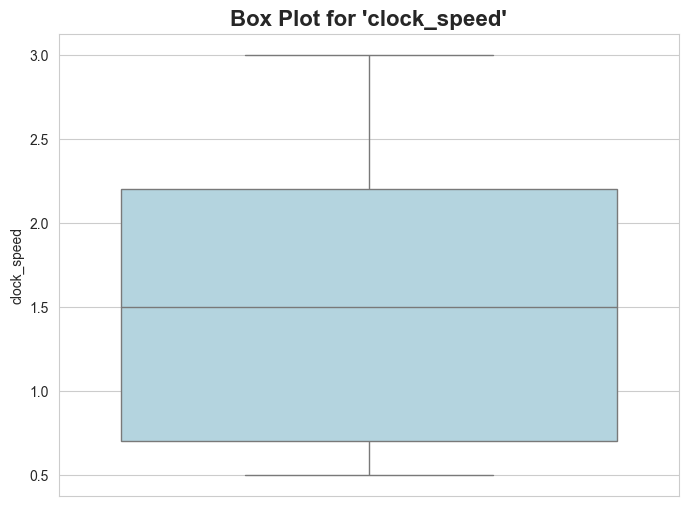

Outliers pada kolom 'dual_sim': Tidak ditemukan outliers


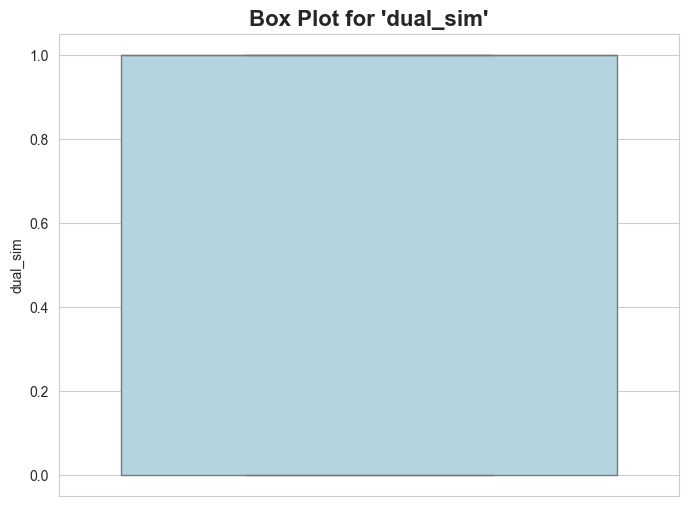

Outliers pada kolom 'fc': 

      battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
53             1290     1          1.4         1  19       1          35   
98             1731     1          2.3         1  18       0          60   
603            1348     0          2.0         0  18       0          52   
778            1533     1          1.1         1  18       1          17   
1035           1708     1          2.4         1  18       1          49   
1072           1137     1          1.0         0  18       0           7   
1150            695     0          0.5         0  18       1          12   
1232           1957     0          1.2         1  18       1          36   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
53      0.3        110        4  ...        405       742   879    16     2   
98      0.5        171        4  ...        142      1039  1220     9     3   
603     0.3         98        3  ...       1869   

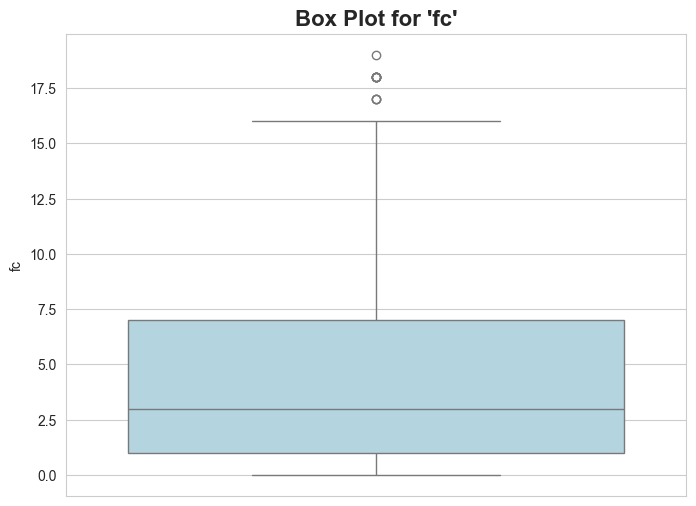

Outliers pada kolom 'four_g': Tidak ditemukan outliers


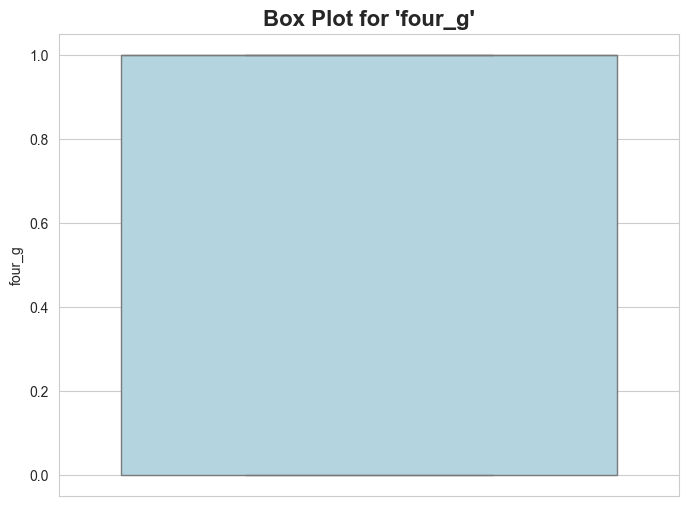

Outliers pada kolom 'int_memory': Tidak ditemukan outliers


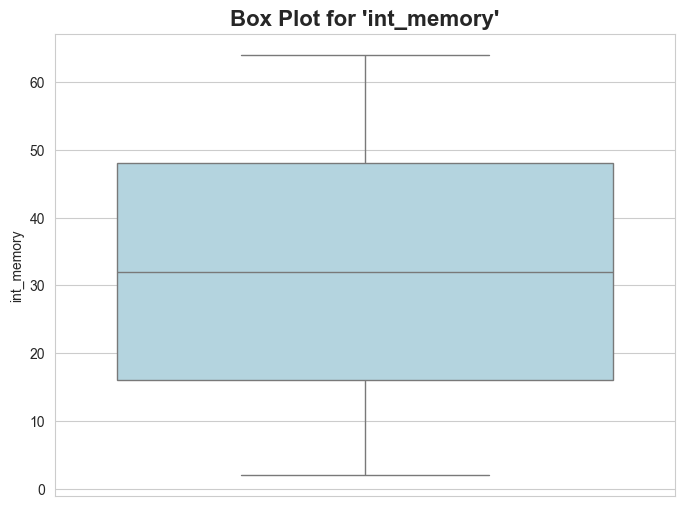

Outliers pada kolom 'm_dep': Tidak ditemukan outliers


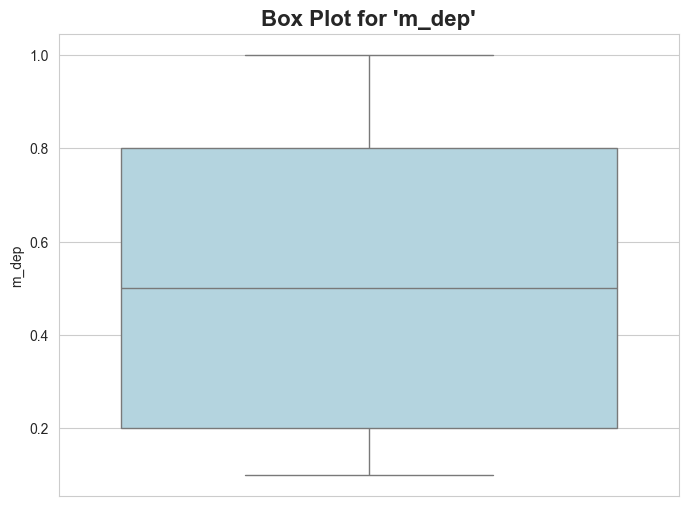

Outliers pada kolom 'mobile_wt': Tidak ditemukan outliers


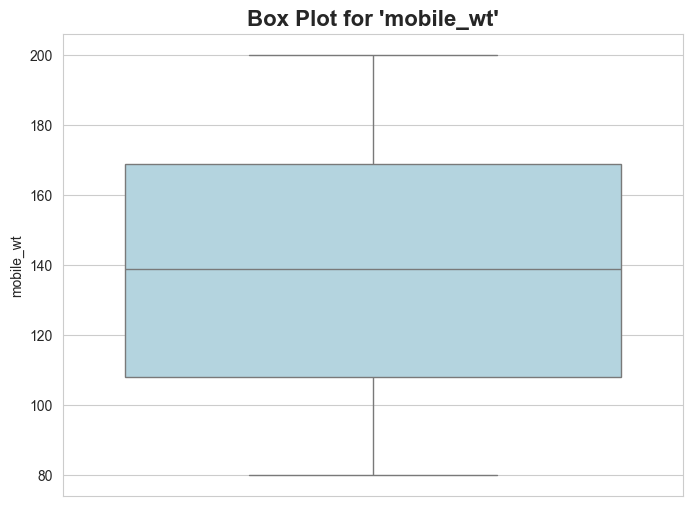

Outliers pada kolom 'n_cores': Tidak ditemukan outliers


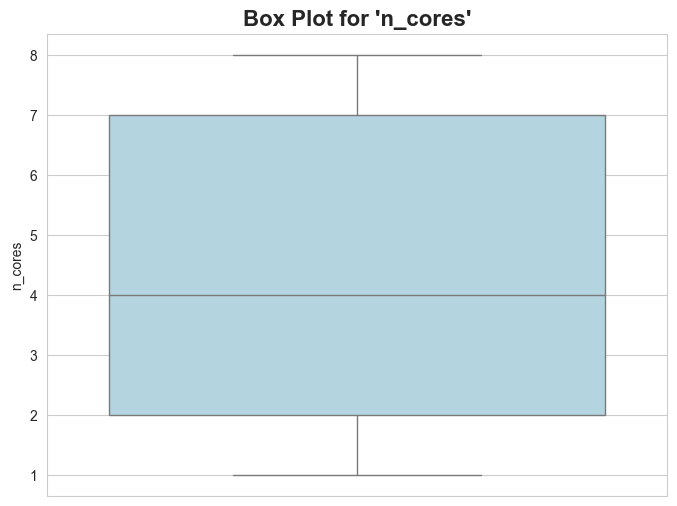

Outliers pada kolom 'pc': Tidak ditemukan outliers


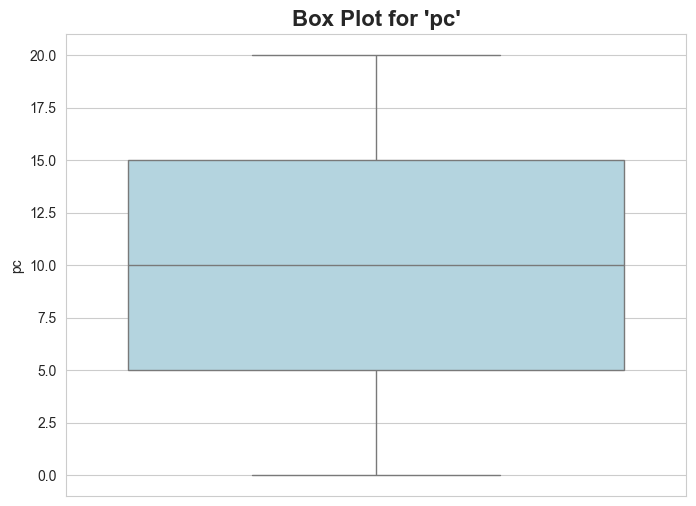

Outliers pada kolom 'px_height': Tidak ditemukan outliers


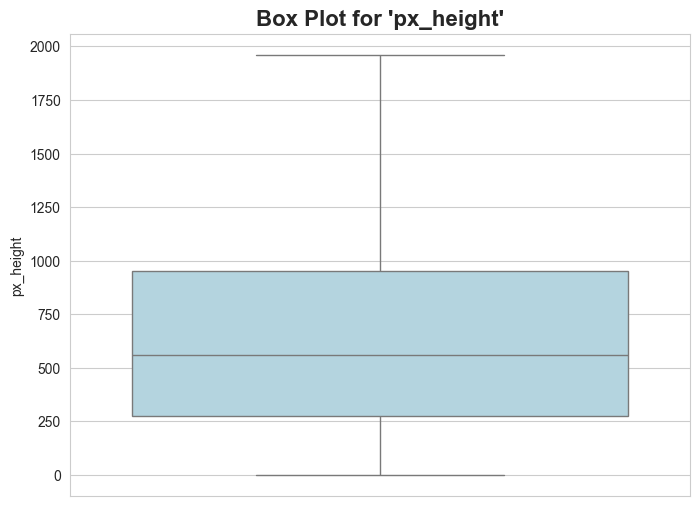

Outliers pada kolom 'px_width': Tidak ditemukan outliers


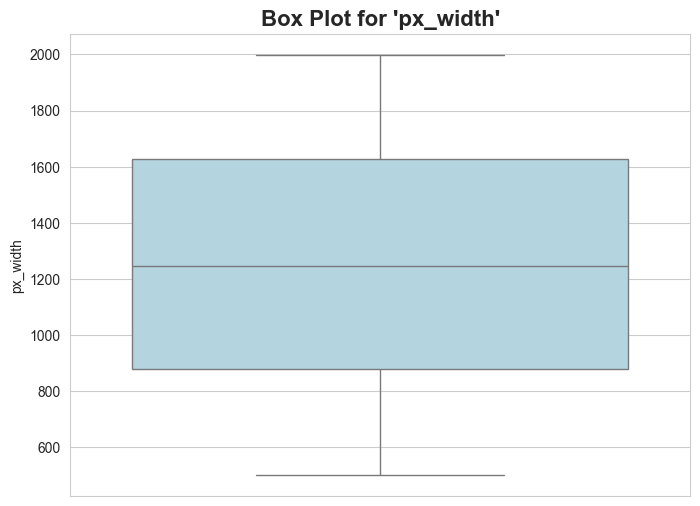

Outliers pada kolom 'ram': Tidak ditemukan outliers


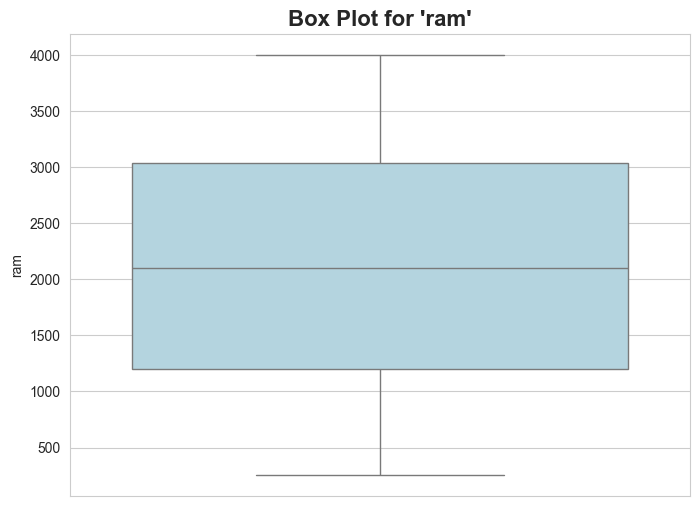

Outliers pada kolom 'sc_h': Tidak ditemukan outliers


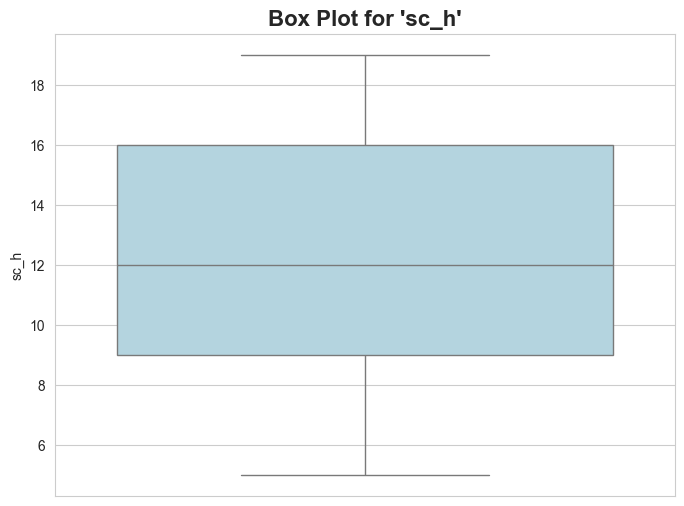

Outliers pada kolom 'sc_w': Tidak ditemukan outliers


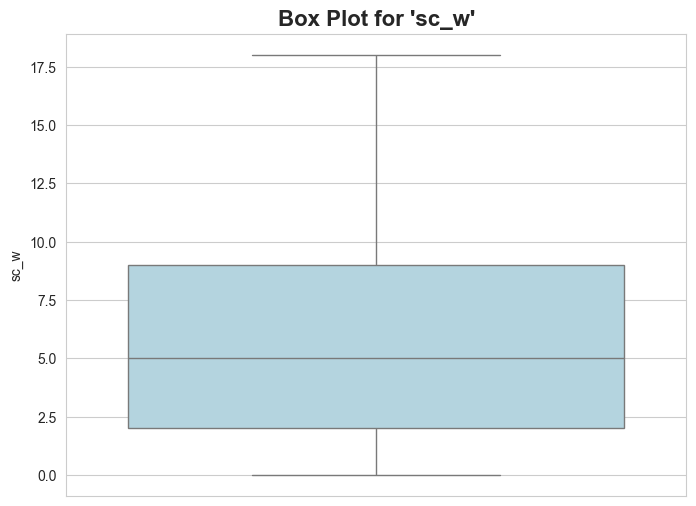

Outliers pada kolom 'talk_time': Tidak ditemukan outliers


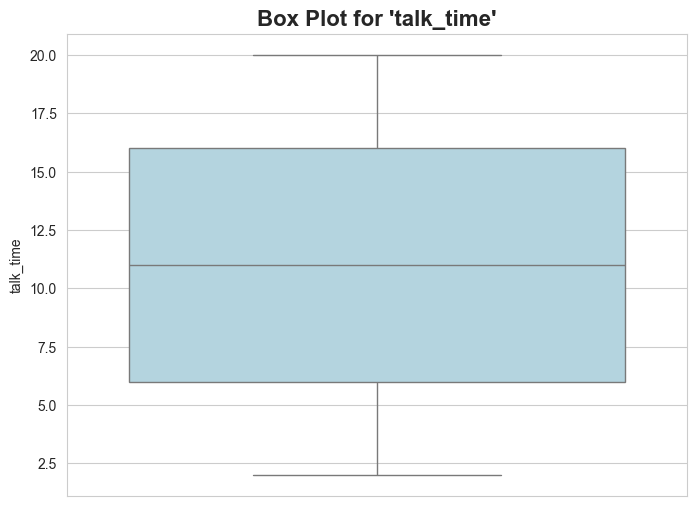

Outliers pada kolom 'three_g': Tidak ditemukan outliers


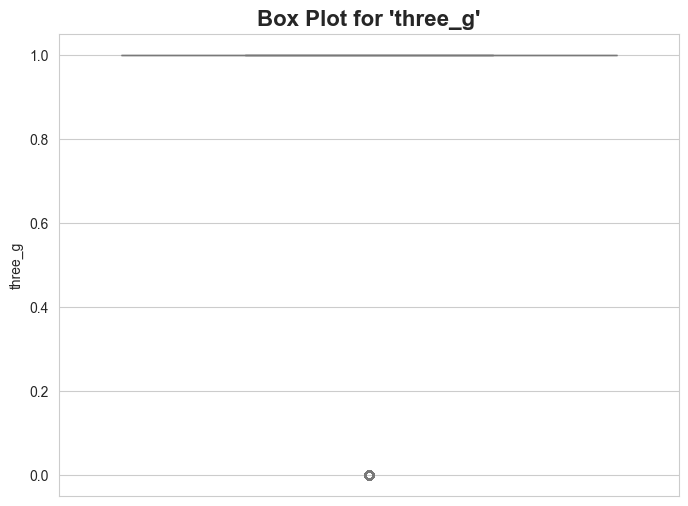

Outliers pada kolom 'touch_screen': Tidak ditemukan outliers


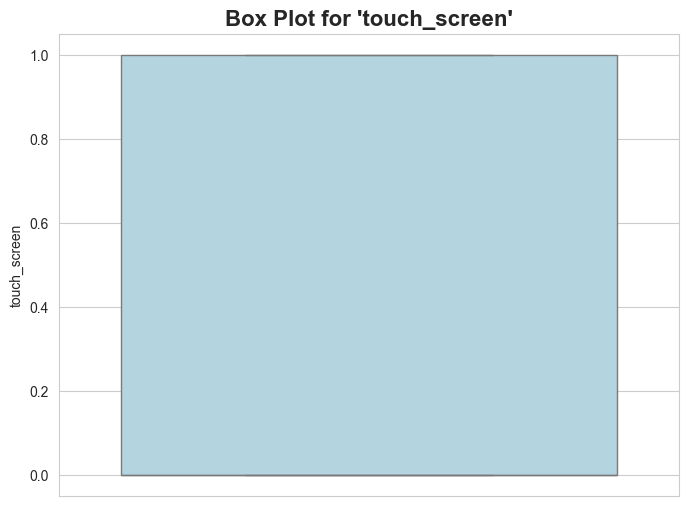

Outliers pada kolom 'wifi': Tidak ditemukan outliers


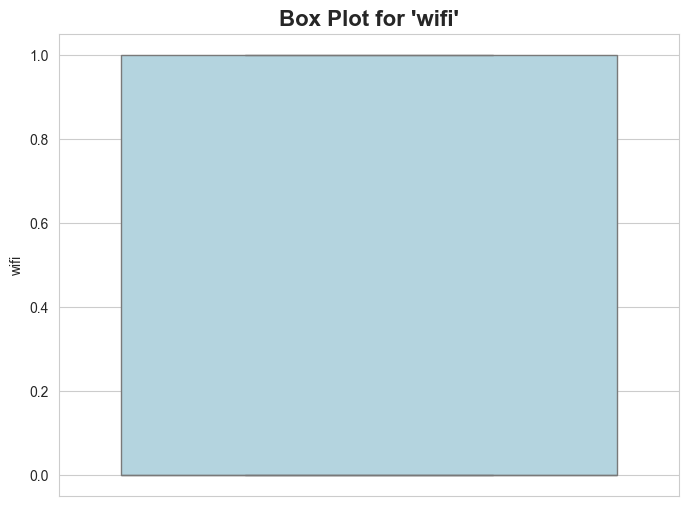

Outliers pada kolom 'price_range': Tidak ditemukan outliers


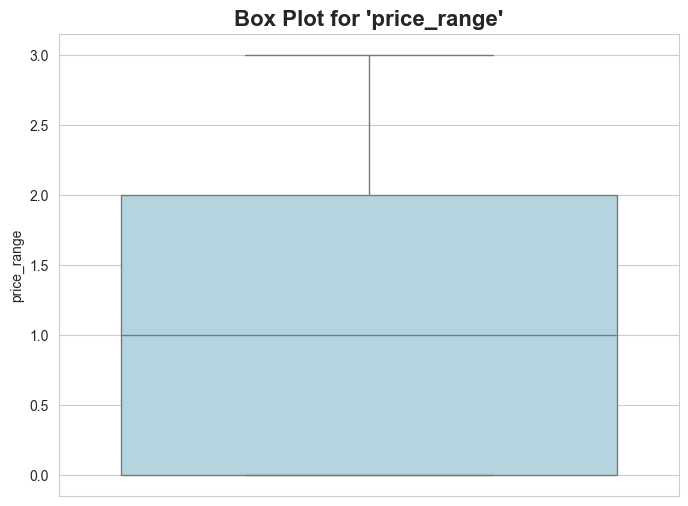

In [106]:
columns = ['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi', 'price_range']

for col in columns:
    z_scores = stats.zscore(df_train[col])
    threshold = 3
    outliers = (abs(z_scores) > threshold)
    outlier_rows = df_train[outliers]

    print(f"Outliers pada kolom '{col}':", end=" ")
    if (len(outlier_rows) == 0):
        print('Tidak ditemukan outliers')
    else:
        print("\n")
        print(outlier_rows)

    plt.figure(figsize=(8, 6))
    sns.set_style("whitegrid")  
    ax = sns.boxplot(y=df_train[col], orient='v', color='lightblue') 
    plt.title(f"Box Plot for '{col}'", fontsize=16, fontweight='bold')
    
    for i in range(len(ax.patches)):
        if outliers[i]:
            ax.annotate('Outlier', (i, df_train[col].max()), ha='center', fontsize=10, color='red')

    plt.show()


### SOAL 5 : Mencari distribusi data dan histogram
---
---

#### 5.a. Distribusi data pada kolom numerik

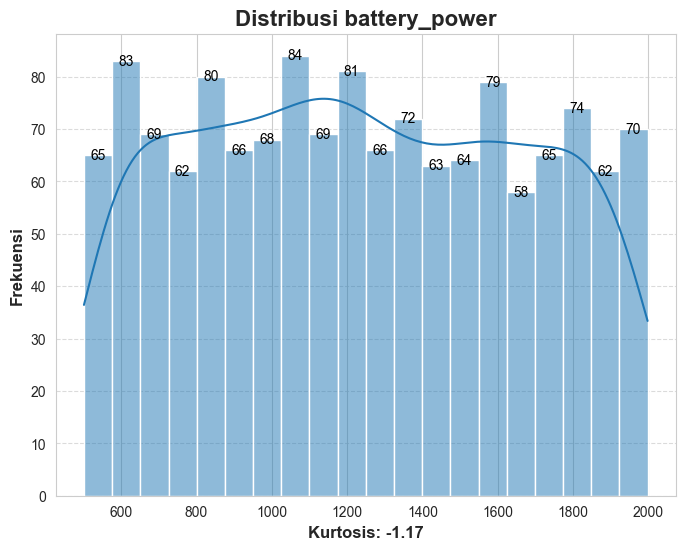

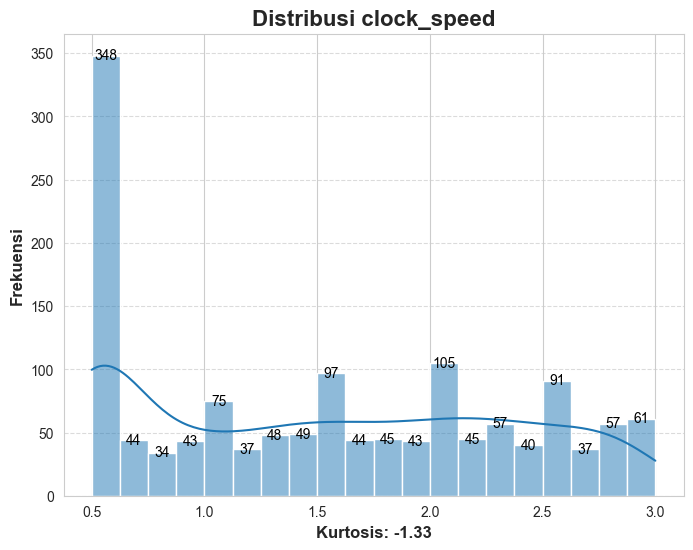

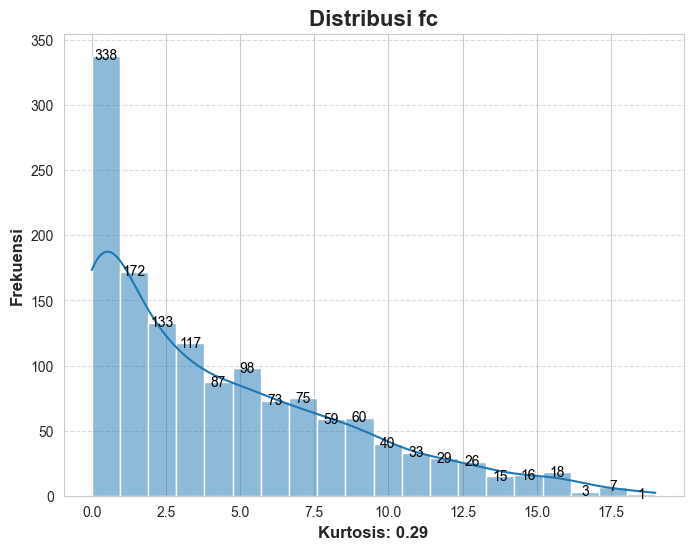

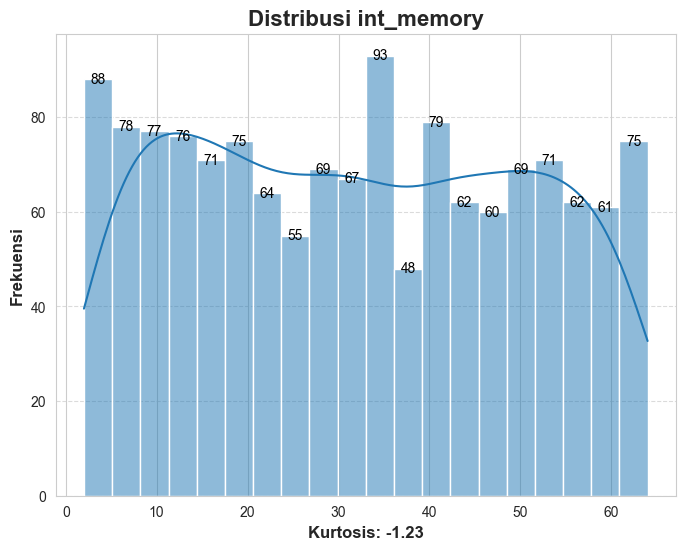

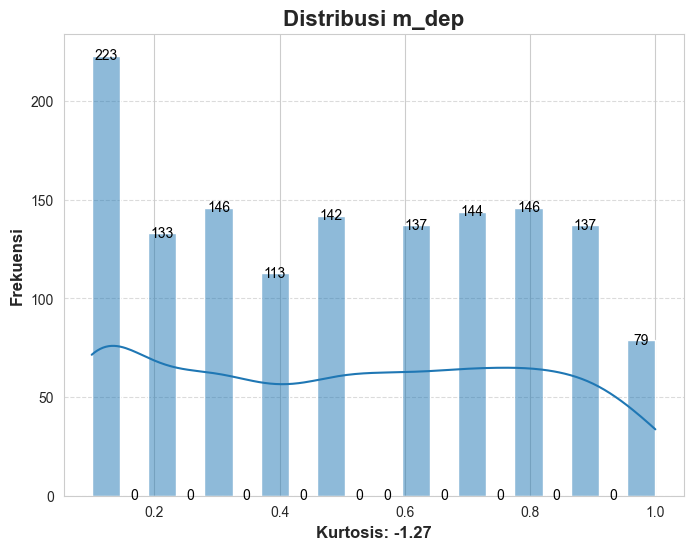

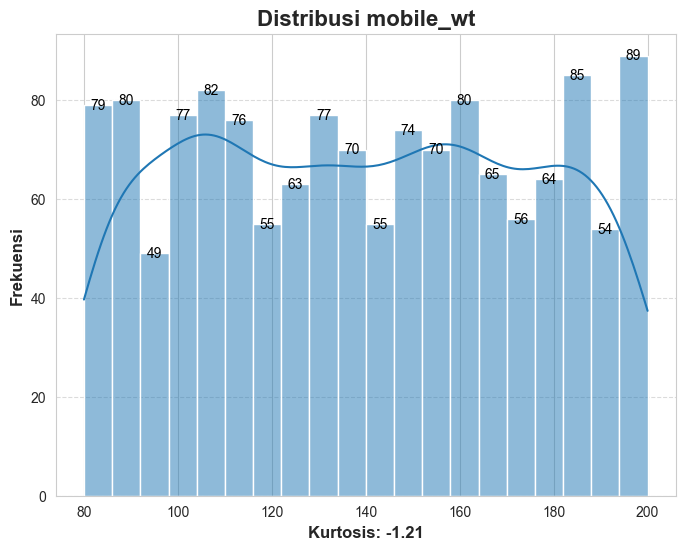

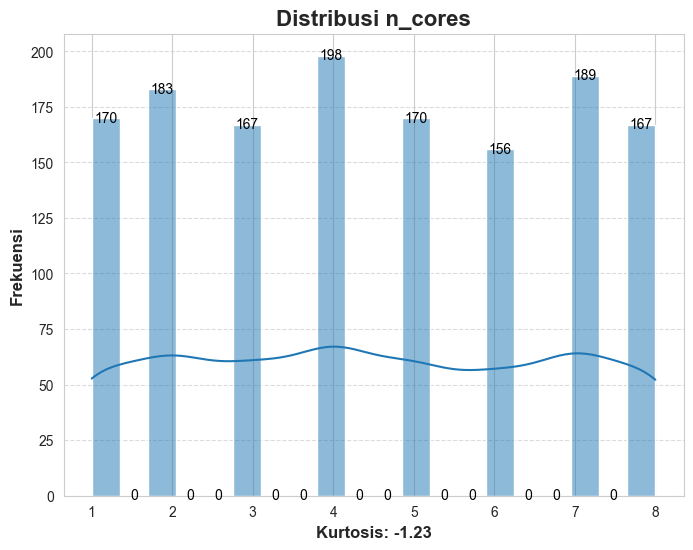

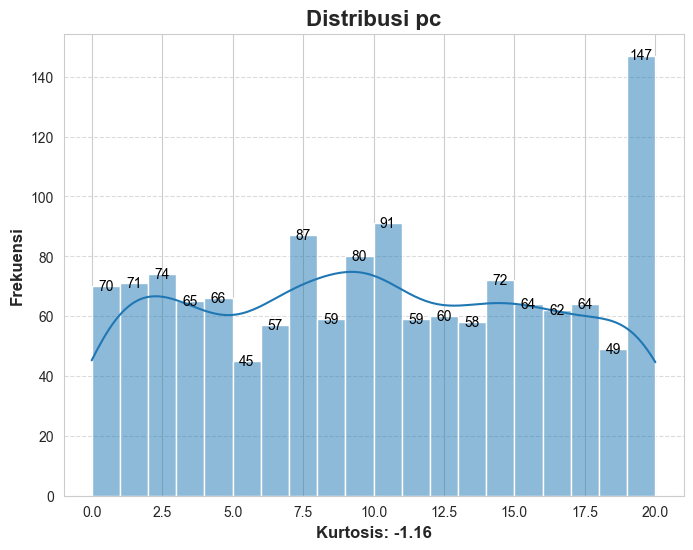

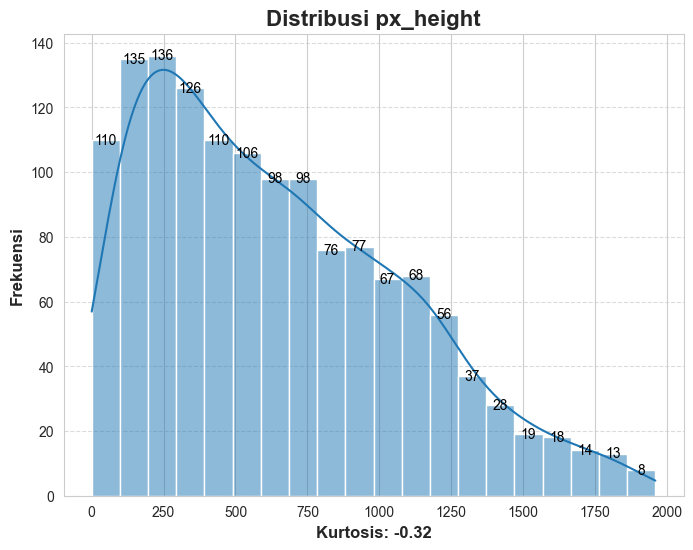

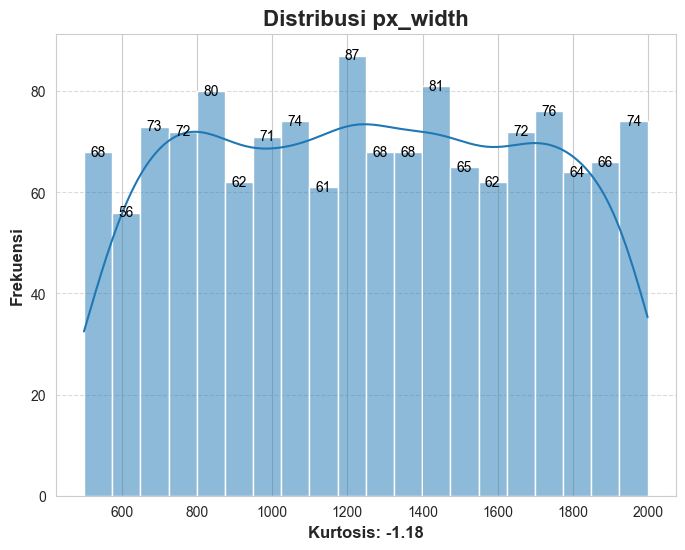

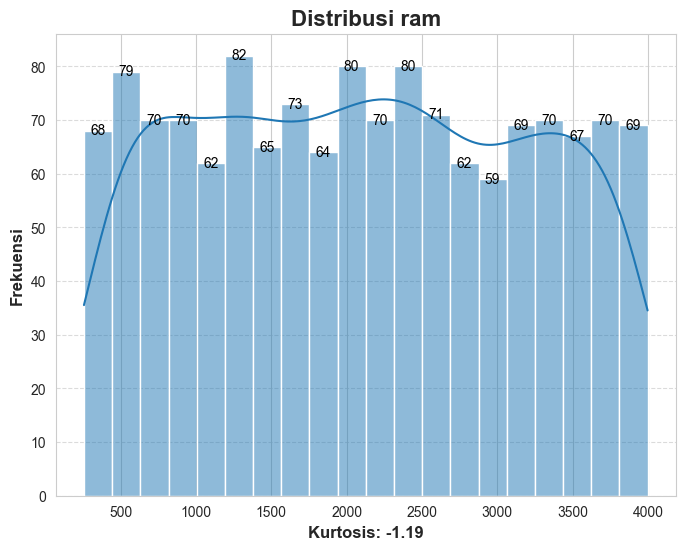

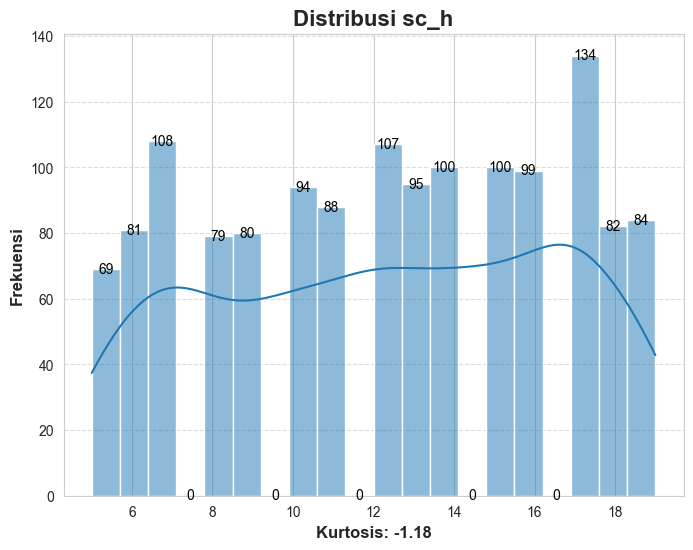

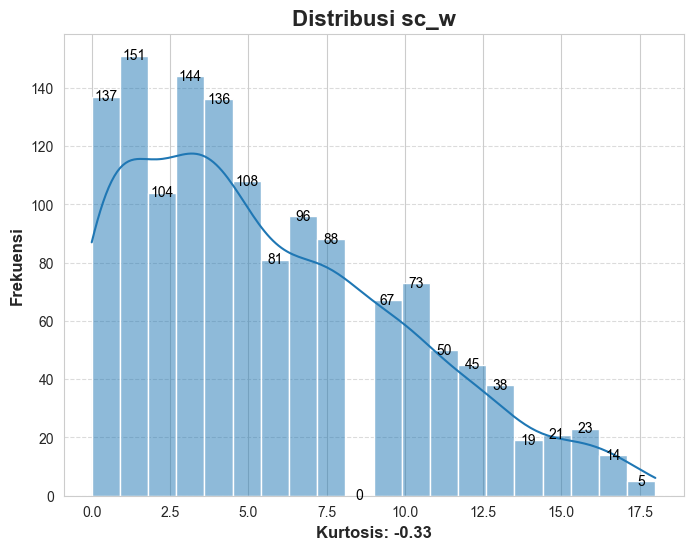

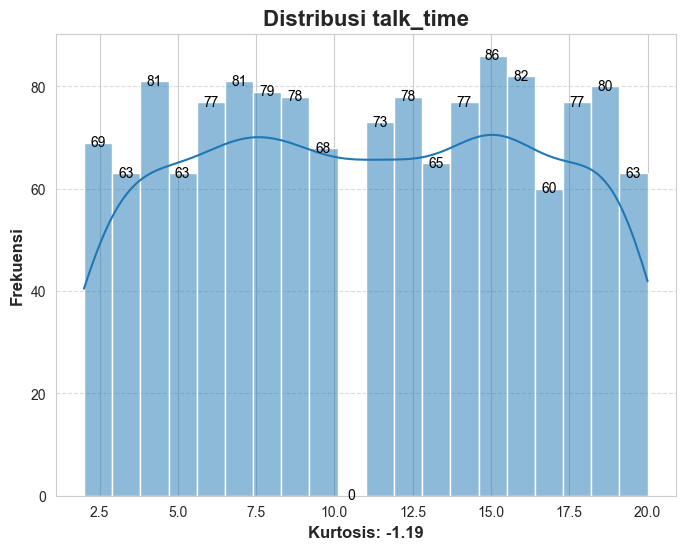

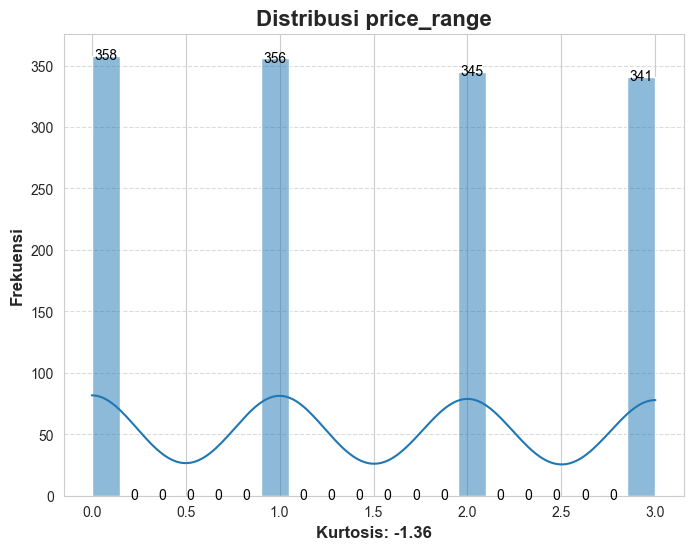

In [104]:
numeric_column = ['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'price_range']

for col in numeric_column:
    plt.figure(figsize=(8, 6))
    sns.set_style("whitegrid")
    ax = sns.histplot(df_train[col], kde=True, bins=20) 
    plt.title(f'Distribusi {col}', fontsize=16, fontweight='bold') 
    kurt = df_train[col].kurtosis()
    plt.xlabel(f'Kurtosis: {kurt:.2f}', fontsize=12, fontweight='bold') 
    plt.ylabel('Frekuensi', fontsize=12, fontweight='bold')
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.grid(axis='y', linestyle='--', alpha=0.7) 
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black')
    plt.show()

#### 5.b. Histogram pada kolom non-numerik

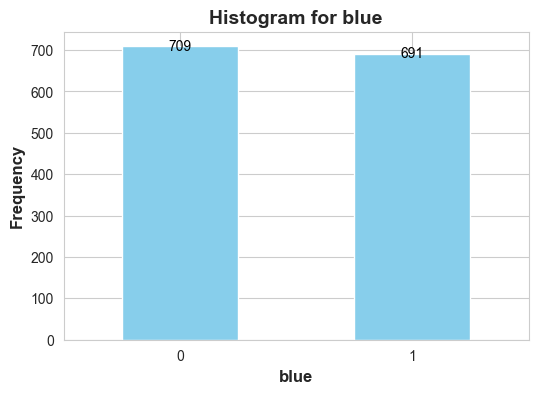

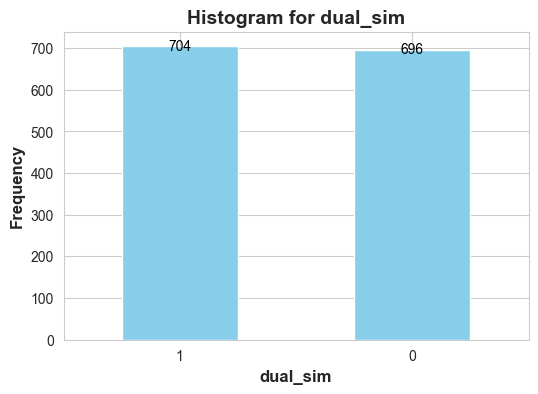

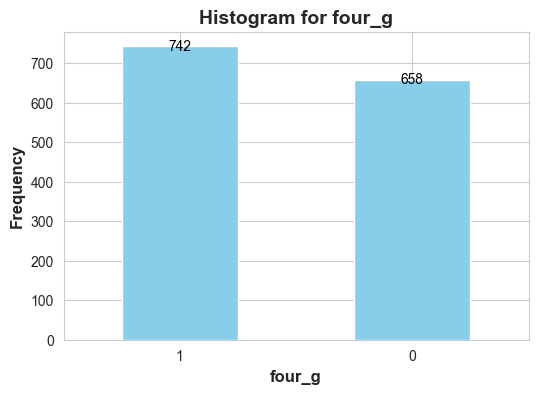

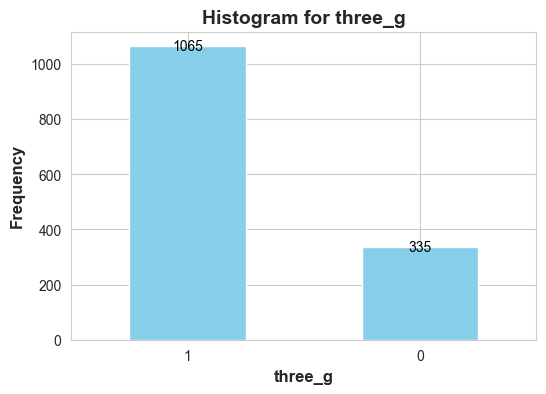

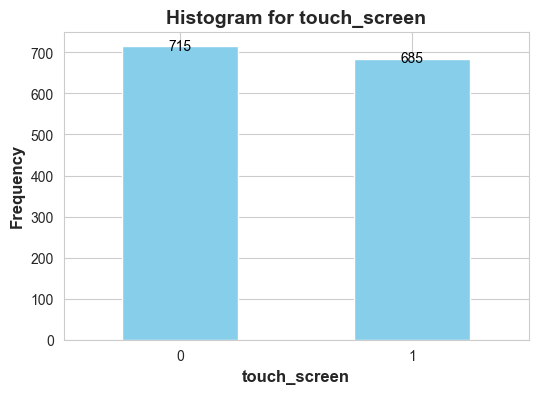

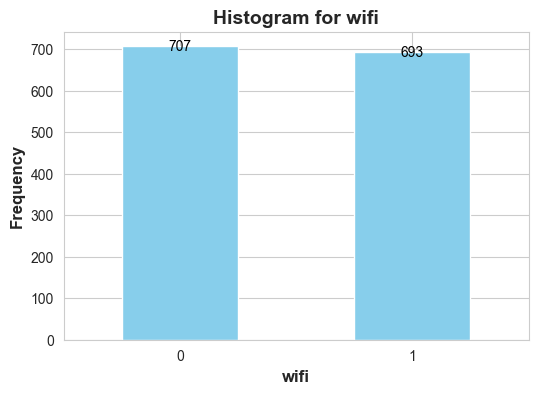

In [105]:
non_numeric_column = ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']

for col in non_numeric_column:
    plt.figure(figsize=(6, 4))
    sns.set_style("whitegrid") 
    ax = df_train[col].value_counts().plot(kind='bar', color='skyblue')
    plt.title(f'Histogram for {col}', fontsize=14, fontweight='bold') 
    plt.xlabel(col, fontsize=12, fontweight='bold') 
    plt.ylabel('Frequency', fontsize=12, fontweight='bold') 
    plt.xticks(rotation=0, fontsize=10)
    plt.yticks(fontsize=10)
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black')
    plt.show()


### SOAL 6 : Korelasi dengan kolom target
---
---

In [108]:
correlation = df_train.corr(method='pearson')['price_range']
print(correlation)

battery_power    0.184801
blue             0.041947
clock_speed      0.014031
dual_sim        -0.010756
fc              -0.003842
four_g           0.000551
int_memory       0.026176
m_dep            0.001205
mobile_wt       -0.074769
n_cores         -0.000582
pc              -0.005214
px_height        0.158833
px_width         0.178713
ram              0.918319
sc_h             0.012149
sc_w             0.019912
talk_time        0.011113
three_g          0.027098
touch_screen    -0.029842
wifi             0.034329
price_range      1.000000
Name: price_range, dtype: float64


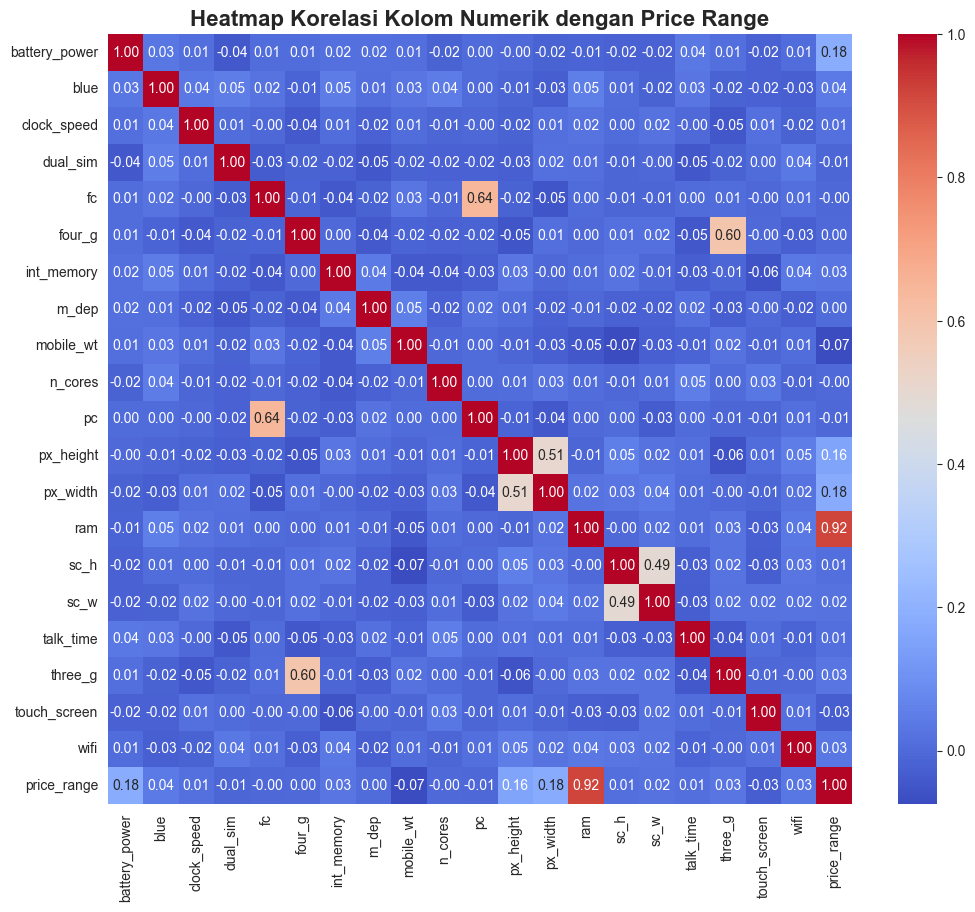

In [110]:
correlation_matrix = df_train.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap Korelasi Kolom Numerik dengan Price Range", fontsize=16, fontweight='bold')
plt.show()